## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512,activation="relu")(input_layer)
    x = keras.layers.Dense(units=256,activation="relu")(x)
    x = keras.layers.Dense(units=128,activation="relu")(x)
    out = keras.layers.Dense(units=10,activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer],outputs=[out])
    return model


In [5]:
model = build_mlp()

model.summary()

SGD = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer = SGD,loss="categorical_crossentropy",metrics=["accuracy"])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


C:\Users\loe_lin\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 12s 14ms/step - loss: 1.9855 - accuracy: 0.2787 - val_loss: 1.7039 - val_accuracy: 0.3957
Epoch 2/500
196/196 [==============================] - 3s 14ms/step - loss: 1.6540 - accuracy: 0.4142 - val_loss: 1.6589 - val_accuracy: 0.4165
Epoch 3/500
196/196 [==============================] - 3s 15ms/step - loss: 1.5711 - accuracy: 0.4413 - val_loss: 1.5920 - val_accuracy: 0.4255
Epoch 4/500
196/196 [==============================] - 2s 13ms/step - loss: 1.4959 - accuracy: 0.4671 - val_loss: 1.7606 - val_accuracy: 0.3587
Epoch 5/500
196/196 [==============================] - 2s 13ms/step - loss: 1.4626 - accuracy: 0.4782 - val_loss: 1.4833 - val_accuracy: 0.4656
Epoch 6/500
196/196 [==============================] - 3s 13ms/step - loss: 1.4038 - accuracy: 0.5017 - val_loss: 1.4561 - val_accuracy: 0.4748
Epoch 7/500
196/196 [==============================] - 2s 13ms/step - loss: 1.3689 - accuracy: 0.5158 - val_loss: 1.4319 - val_accuracy

196/196 [==============================] - 2s 12ms/step - loss: 0.3203 - accuracy: 0.8887 - val_loss: 2.2113 - val_accuracy: 0.5209
Epoch 58/500
196/196 [==============================] - 2s 12ms/step - loss: 0.2952 - accuracy: 0.8971 - val_loss: 2.6936 - val_accuracy: 0.4780
Epoch 59/500
196/196 [==============================] - 2s 12ms/step - loss: 0.3079 - accuracy: 0.8933 - val_loss: 2.4855 - val_accuracy: 0.5109
Epoch 60/500
196/196 [==============================] - 2s 11ms/step - loss: 0.2986 - accuracy: 0.8963 - val_loss: 2.4126 - val_accuracy: 0.5183
Epoch 61/500
196/196 [==============================] - 2s 11ms/step - loss: 0.2735 - accuracy: 0.9032 - val_loss: 2.4313 - val_accuracy: 0.5243
Epoch 62/500
196/196 [==============================] - 2s 12ms/step - loss: 0.2414 - accuracy: 0.9180 - val_loss: 2.5188 - val_accuracy: 0.5172
Epoch 63/500
196/196 [==============================] - 2s 11ms/step - loss: 0.2654 - accuracy: 0.9066 - val_loss: 2.4757 - val_accuracy: 0.517

196/196 [==============================] - 2s 11ms/step - loss: 0.1241 - accuracy: 0.9568 - val_loss: 4.0092 - val_accuracy: 0.5260
Epoch 114/500
196/196 [==============================] - 2s 11ms/step - loss: 0.1022 - accuracy: 0.9636 - val_loss: 3.9814 - val_accuracy: 0.5246
Epoch 115/500
196/196 [==============================] - 2s 12ms/step - loss: 0.0906 - accuracy: 0.9689 - val_loss: 3.9569 - val_accuracy: 0.5234
Epoch 116/500
196/196 [==============================] - 2s 12ms/step - loss: 0.0714 - accuracy: 0.9745 - val_loss: 4.0659 - val_accuracy: 0.5257
Epoch 117/500
196/196 [==============================] - 2s 12ms/step - loss: 0.0822 - accuracy: 0.9706 - val_loss: 4.0875 - val_accuracy: 0.5267
Epoch 118/500
196/196 [==============================] - 2s 11ms/step - loss: 0.0752 - accuracy: 0.9732 - val_loss: 4.5327 - val_accuracy: 0.5144
Epoch 119/500
196/196 [==============================] - 2s 11ms/step - loss: 0.1215 - accuracy: 0.9579 - val_loss: 4.0822 - val_accuracy:

196/196 [==============================] - 2s 11ms/step - loss: 8.5769e-04 - accuracy: 1.0000 - val_loss: 4.9352 - val_accuracy: 0.5496
Epoch 170/500
196/196 [==============================] - 2s 11ms/step - loss: 4.6805e-04 - accuracy: 1.0000 - val_loss: 4.9584 - val_accuracy: 0.5507
Epoch 171/500
196/196 [==============================] - 2s 11ms/step - loss: 4.4639e-04 - accuracy: 1.0000 - val_loss: 4.9994 - val_accuracy: 0.5490
Epoch 172/500
196/196 [==============================] - 2s 11ms/step - loss: 7.4233e-04 - accuracy: 0.9999 - val_loss: 4.9866 - val_accuracy: 0.5516
Epoch 173/500
196/196 [==============================] - 2s 11ms/step - loss: 4.7795e-04 - accuracy: 1.0000 - val_loss: 5.0101 - val_accuracy: 0.5509
Epoch 174/500
196/196 [==============================] - 2s 12ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 5.0161 - val_accuracy: 0.5492
Epoch 175/500
196/196 [==============================] - 2s 12ms/step - loss: 4.4355e-04 - accuracy: 1.0000 - val_loss

Epoch 224/500
196/196 [==============================] - 2s 11ms/step - loss: 1.5393e-04 - accuracy: 1.0000 - val_loss: 5.2546 - val_accuracy: 0.5516
Epoch 225/500
196/196 [==============================] - 2s 12ms/step - loss: 1.5257e-04 - accuracy: 1.0000 - val_loss: 5.2596 - val_accuracy: 0.5511
Epoch 226/500
196/196 [==============================] - 2s 12ms/step - loss: 1.5892e-04 - accuracy: 1.0000 - val_loss: 5.2604 - val_accuracy: 0.5509
Epoch 227/500
196/196 [==============================] - 2s 12ms/step - loss: 1.5349e-04 - accuracy: 1.0000 - val_loss: 5.2621 - val_accuracy: 0.5520
Epoch 228/500
196/196 [==============================] - 2s 12ms/step - loss: 1.5521e-04 - accuracy: 1.0000 - val_loss: 5.2684 - val_accuracy: 0.5516
Epoch 229/500
196/196 [==============================] - 2s 12ms/step - loss: 1.5210e-04 - accuracy: 1.0000 - val_loss: 5.2685 - val_accuracy: 0.5518
Epoch 230/500
196/196 [==============================] - 2s 12ms/step - loss: 1.4648e-04 - accuracy:

196/196 [==============================] - 2s 12ms/step - loss: 1.1169e-04 - accuracy: 1.0000 - val_loss: 5.3753 - val_accuracy: 0.5517
Epoch 279/500
196/196 [==============================] - 2s 12ms/step - loss: 1.1123e-04 - accuracy: 1.0000 - val_loss: 5.3798 - val_accuracy: 0.5512
Epoch 280/500
196/196 [==============================] - 2s 12ms/step - loss: 1.0824e-04 - accuracy: 1.0000 - val_loss: 5.3811 - val_accuracy: 0.5510
Epoch 281/500
196/196 [==============================] - 2s 13ms/step - loss: 1.0859e-04 - accuracy: 1.0000 - val_loss: 5.3821 - val_accuracy: 0.5513
Epoch 282/500
196/196 [==============================] - 3s 13ms/step - loss: 1.0726e-04 - accuracy: 1.0000 - val_loss: 5.3836 - val_accuracy: 0.5506
Epoch 283/500
196/196 [==============================] - 3s 14ms/step - loss: 1.0690e-04 - accuracy: 1.0000 - val_loss: 5.3862 - val_accuracy: 0.5515
Epoch 284/500
196/196 [==============================] - 3s 14ms/step - loss: 1.0638e-04 - accuracy: 1.0000 - val_

Epoch 333/500
196/196 [==============================] - 2s 13ms/step - loss: 8.3069e-05 - accuracy: 1.0000 - val_loss: 5.4618 - val_accuracy: 0.5517
Epoch 334/500
196/196 [==============================] - 2s 12ms/step - loss: 8.6538e-05 - accuracy: 1.0000 - val_loss: 5.4632 - val_accuracy: 0.5514
Epoch 335/500
196/196 [==============================] - 2s 12ms/step - loss: 8.1329e-05 - accuracy: 1.0000 - val_loss: 5.4649 - val_accuracy: 0.5517
Epoch 336/500
196/196 [==============================] - 2s 12ms/step - loss: 8.4535e-05 - accuracy: 1.0000 - val_loss: 5.4665 - val_accuracy: 0.5509
Epoch 337/500
196/196 [==============================] - 3s 13ms/step - loss: 8.6143e-05 - accuracy: 1.0000 - val_loss: 5.4686 - val_accuracy: 0.5517
Epoch 338/500
196/196 [==============================] - 3s 13ms/step - loss: 8.3750e-05 - accuracy: 1.0000 - val_loss: 5.4700 - val_accuracy: 0.5515
Epoch 339/500
196/196 [==============================] - 3s 13ms/step - loss: 8.1619e-05 - accuracy:

196/196 [==============================] - 2s 12ms/step - loss: 6.7746e-05 - accuracy: 1.0000 - val_loss: 5.5283 - val_accuracy: 0.5509
Epoch 388/500
196/196 [==============================] - 2s 12ms/step - loss: 6.9362e-05 - accuracy: 1.0000 - val_loss: 5.5293 - val_accuracy: 0.5511
Epoch 389/500
196/196 [==============================] - 2s 12ms/step - loss: 7.0374e-05 - accuracy: 1.0000 - val_loss: 5.5309 - val_accuracy: 0.5515
Epoch 390/500
196/196 [==============================] - 2s 12ms/step - loss: 6.7940e-05 - accuracy: 1.0000 - val_loss: 5.5311 - val_accuracy: 0.5510
Epoch 391/500
196/196 [==============================] - 3s 13ms/step - loss: 6.9559e-05 - accuracy: 1.0000 - val_loss: 5.5327 - val_accuracy: 0.5507
Epoch 392/500
196/196 [==============================] - 2s 13ms/step - loss: 6.9648e-05 - accuracy: 1.0000 - val_loss: 5.5334 - val_accuracy: 0.5509
Epoch 393/500
196/196 [==============================] - 2s 13ms/step - loss: 6.8053e-05 - accuracy: 1.0000 - val_

Epoch 442/500
196/196 [==============================] - 2s 12ms/step - loss: 6.0686e-05 - accuracy: 1.0000 - val_loss: 5.5836 - val_accuracy: 0.5505
Epoch 443/500
196/196 [==============================] - 2s 11ms/step - loss: 5.9431e-05 - accuracy: 1.0000 - val_loss: 5.5839 - val_accuracy: 0.5507
Epoch 444/500
196/196 [==============================] - 2s 11ms/step - loss: 5.9164e-05 - accuracy: 1.0000 - val_loss: 5.5858 - val_accuracy: 0.5497
Epoch 445/500
196/196 [==============================] - 2s 11ms/step - loss: 5.9127e-05 - accuracy: 1.0000 - val_loss: 5.5863 - val_accuracy: 0.5505
Epoch 446/500
196/196 [==============================] - 2s 12ms/step - loss: 5.9835e-05 - accuracy: 1.0000 - val_loss: 5.5874 - val_accuracy: 0.5508
Epoch 447/500
196/196 [==============================] - 2s 11ms/step - loss: 5.8343e-05 - accuracy: 1.0000 - val_loss: 5.5884 - val_accuracy: 0.5508
Epoch 448/500
196/196 [==============================] - 2s 11ms/step - loss: 5.8762e-05 - accuracy:

196/196 [==============================] - 2s 11ms/step - loss: 5.1237e-05 - accuracy: 1.0000 - val_loss: 5.6302 - val_accuracy: 0.5507
Epoch 497/500
196/196 [==============================] - 2s 11ms/step - loss: 5.3343e-05 - accuracy: 1.0000 - val_loss: 5.6312 - val_accuracy: 0.5503
Epoch 498/500
196/196 [==============================] - 2s 12ms/step - loss: 5.1789e-05 - accuracy: 1.0000 - val_loss: 5.6312 - val_accuracy: 0.5505
Epoch 499/500
196/196 [==============================] - 2s 12ms/step - loss: 5.2016e-05 - accuracy: 1.0000 - val_loss: 5.6328 - val_accuracy: 0.5505
Epoch 500/500
196/196 [==============================] - 2s 11ms/step - loss: 5.2134e-05 - accuracy: 1.0000 - val_loss: 5.6329 - val_accuracy: 0.5505


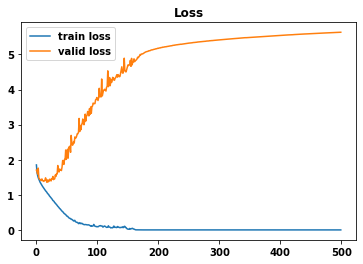

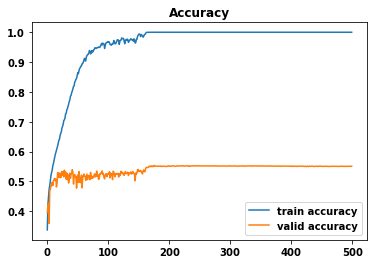

In [7]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()